In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('Algerian_forest_fires_dataset_cleaned.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.drop(['month','year','day'],axis=1,inplace=True)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
## Encoding
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [6]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [7]:
## independent and dependent feature
X=df.drop('FWI',axis=1)
y=df['FWI']

In [8]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [9]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [10]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [11]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [12]:
## feature selection
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

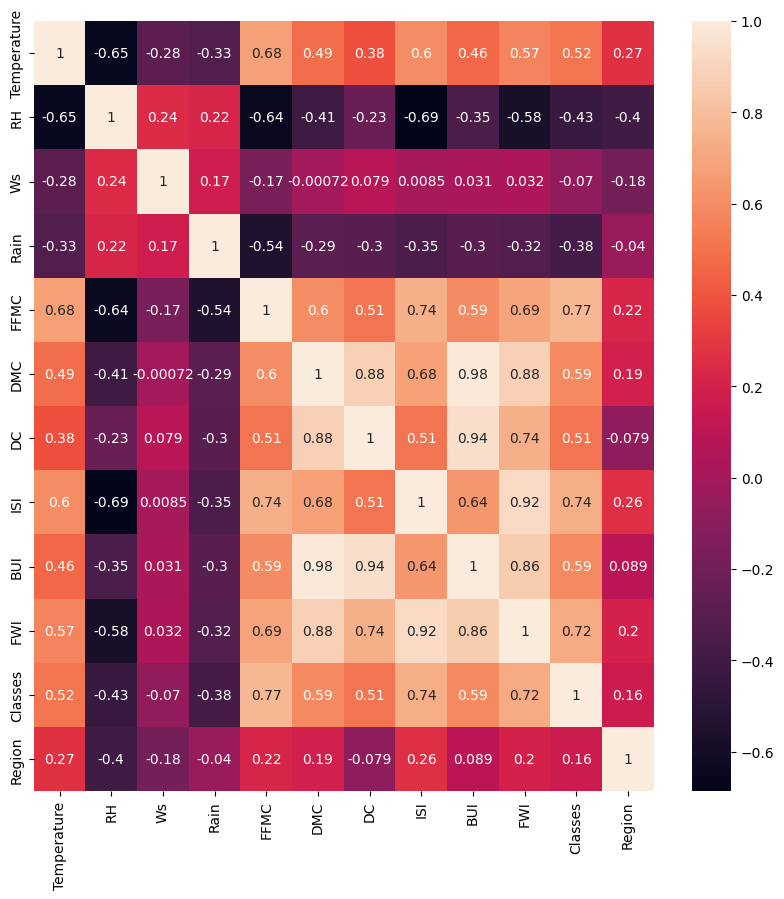

In [13]:
## check for multicollinearity
plt.figure(figsize=(10,10))
corr=df.corr()
sns.heatmap(corr,annot=True)

In [14]:
def correlation(dataset,threshold):
    corr=set()
    corr_mat=dataset.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if(abs(corr_mat.iloc[i,j])>threshold):
                ans=corr_mat.columns[i],corr_mat.columns[j]
                corr.add(ans)
    return corr

In [15]:
corri=correlation(X_train,0.8)

In [16]:
## drop feature whose correlation more than 0.8
columns_to_drop = set()
for pair in corri:
    columns_to_drop.update(pair)

# Dropping the columns with high correlation
X_train.drop(columns=columns_to_drop, axis=1, inplace=True)
X_test.drop(columns=columns_to_drop,axis=1,inplace=True)

In [17]:
X_train.shape,X_test.shape

((182, 8), (61, 8))

#### Feature Scaling and Standardization

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)

In [19]:
X_train_scale

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

#### Box plot to understand effect of standard scaler

Text(0.5, 1.0, 'X_train after scaling')

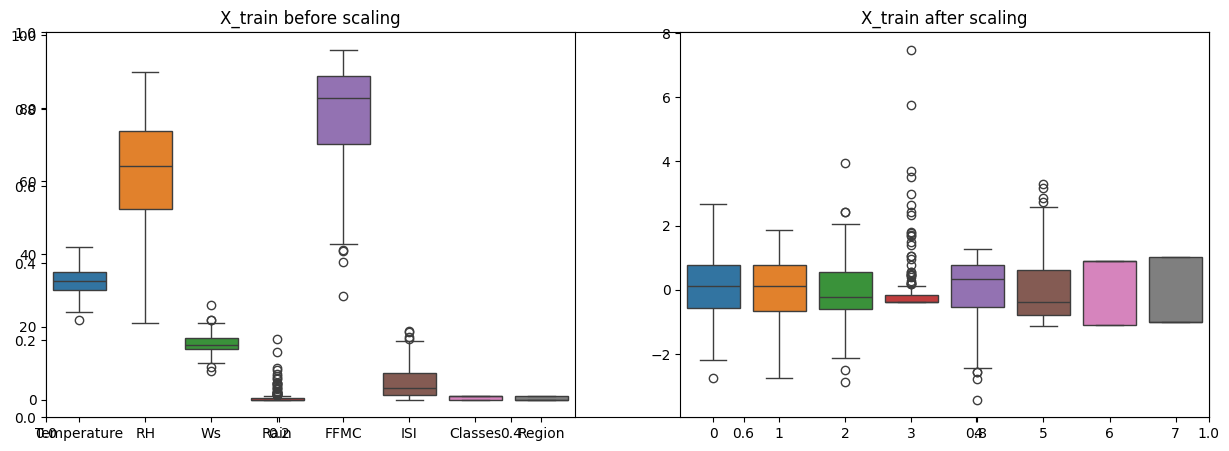

In [20]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scale)
plt.title("X_train after scaling")

#### Linear Regression Model

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
lin_reg=LinearRegression()
lin_reg.fit(X_train_scale,y_train)
y_pred=lin_reg.predict(X_test_scale)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("Accuracy of model ",score)

Mean absolute error 1.6603583040730434
Accuracy of model  0.8619378295406555


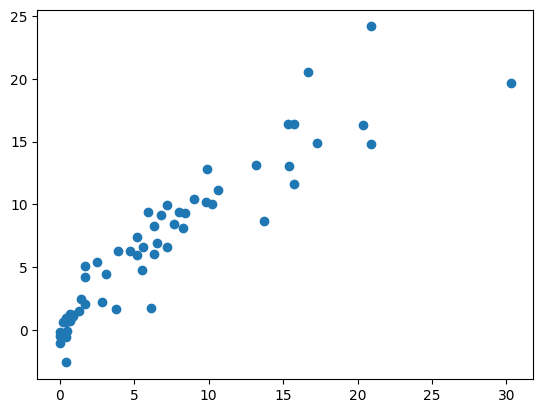

In [22]:
plt.scatter(y_test,y_pred)

#### Lasso Regression

In [23]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score
Lasso=Lasso()
Lasso.fit(X_train_scale,y_train)
y_pred=Lasso.predict(X_test_scale)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("Accuracy of model ",score)

Mean absolute error 1.8118111432818886
Accuracy of model  0.8347656882567904


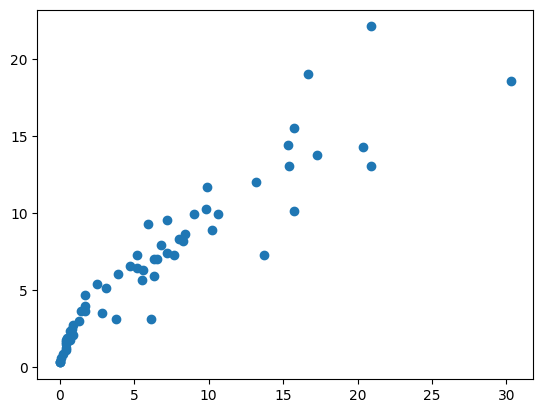

In [24]:
plt.scatter(y_test,y_pred)

In [25]:
## cross-validation
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scale,y_train)

LassoCV(cv=5)

In [26]:
lassocv.predict(X_test_scale)

array([ 9.29015071e+00,  9.99182767e+00,  5.85876631e-03,  1.71795767e+00,
        6.91617072e+00,  6.54111612e-01,  5.41814954e+00,  6.67298918e+00,
        1.08548932e+00,  2.26890489e+00,  6.24316673e-01,  1.79830149e+00,
        1.01930650e+01,  1.48878585e+01,  1.62424984e+01,  1.48231812e+00,
       -2.43354215e+00, -4.23531349e-01,  9.05538888e+00,  4.47870563e+00,
        4.14271468e+00,  9.53495502e-01,  9.44207170e+00,  8.14496409e-01,
        2.41320353e+01,  6.35627239e+00,  6.57073237e+00,  9.97342951e+00,
       -1.03262401e+00,  1.28237218e+01,  8.23662680e+00, -4.91574385e-01,
        1.10838812e+01,  1.15865442e+01,  2.45367019e+00,  1.19486827e+00,
        5.07119861e+00,  4.87449434e+00, -3.76880275e-01,  7.14493247e-01,
        6.06389591e+00,  2.05922671e+00,  8.10841780e+00, -1.06911731e-01,
        1.63667595e+01,  9.38511368e+00,  8.41065200e+00,  7.98919103e-01,
        1.31136915e+01,  1.32418105e+00,  1.96616735e+01,  5.99728695e+00,
        2.05148038e+01,  

In [27]:
lassocv.alpha_

0.012334981670011578

In [28]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [29]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [47.26825958, 59.81506814, 49.37033934, 75.6645852 , 35.31758355],
       [41.72952256, 53.9178721 , 42.74366813, 68.35708298, 31.76996123],
       [36.9194323 , 48.71817989, 37.17519591, 61.92819453, 28.67296816],
       [32.74259519, 44.12989994, 32.51394424, 56.26841266, 25.96868127],
       [29.11607551, 40.07783346, 28.62948585, 51.28216115, 23.60667   ],
       [25.9677706 , 36.49627724, 25.40920807, 46.88600259, 21.54302391],
       [23.23499778, 33.32780703, 22.75593682, 43.00707821, 19.73950669],
       [20.86326543, 30.52221798, 20.58587373, 39.58174949, 18.16282017],
       [18.80520436, 28.03560182, 18.82680555, 36.55441537, 16.78396393],
       [17.01963837, 25.82954313, 17.41654994, 33.87648235, 15.57767819],
       [15.47077611, 23.8704191 , 16.30160688, 31.50546751, 14.52195906],
       [14.1275082 , 22.12878951, 15.43598843, 29.40421737, 13.59763676],
       [12.96279606, 20.57886524, 14.7

Mean absolute error 1.654289466021366
Accuracy of model  0.8620590474571694


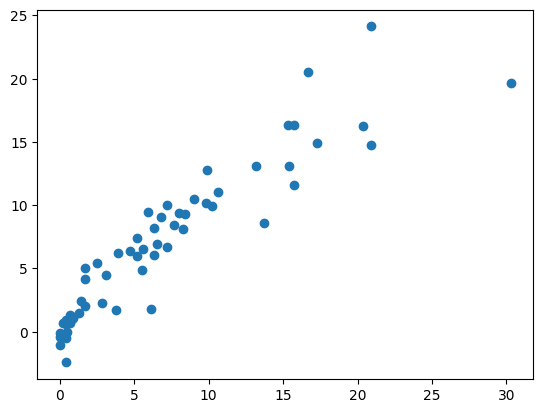

In [30]:
y_pred=lassocv.predict(X_test_scale)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("Accuracy of model ",score)

#### Ridge Regression

Mean absolute error 1.6703957655223358
Accuracy of model  0.8605765496094766


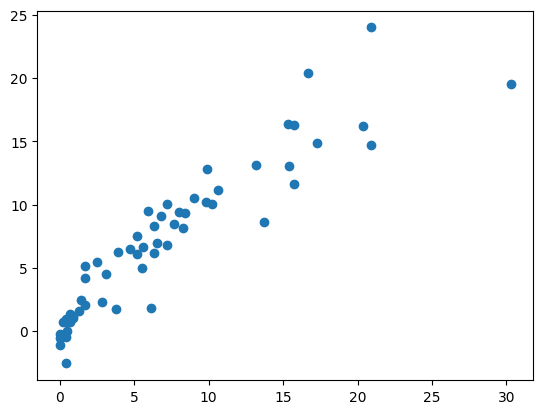

In [31]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
Ridge=Ridge()
Ridge.fit(X_train_scale,y_train)
y_pred=Ridge.predict(X_test_scale)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("Accuracy of model ",score)
plt.scatter(y_test,y_pred)

Mean absolute error 1.8323955527237983
Accuracy of model  0.8445169282059813


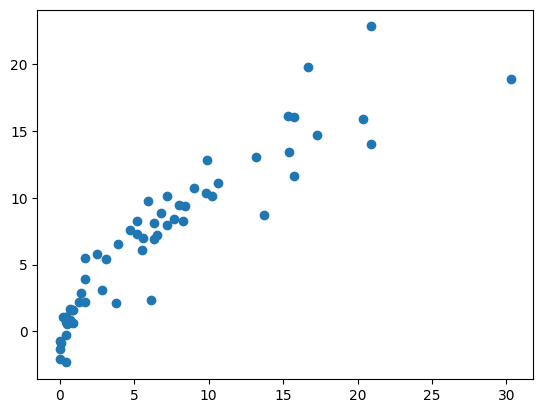

In [32]:
## cross-validation
from sklearn.linear_model import RidgeCV
Ridgecv=RidgeCV(cv=5)
Ridgecv.fit(X_train_scale,y_train)
y_pred=Ridgecv.predict(X_test_scale)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("Accuracy of model ",score)
plt.scatter(y_test,y_pred)

In [33]:
Ridgecv.alpha_

10.0

In [34]:
Ridgecv.alphas

(0.1, 1.0, 10.0)

In [35]:
Ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

#### ElasticNet Regression

Mean absolute error 2.577702088352691
Accuracy of model  0.7285625839450531


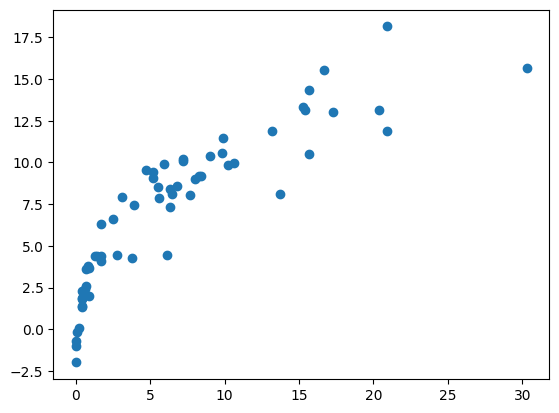

In [36]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score
ElasticNet=ElasticNet()
ElasticNet.fit(X_train_scale,y_train)
y_pred=ElasticNet.predict(X_test_scale)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("Accuracy of model ",score)
plt.scatter(y_test,y_pred)

Mean absolute error 1.6950255400424796
Accuracy of model  0.8562256446928838


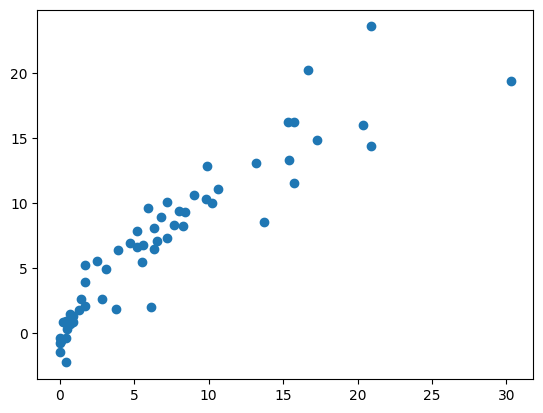

In [37]:
## cross-validation
from sklearn.linear_model import ElasticNetCV
ElasticNetCV=ElasticNetCV(cv=5)
ElasticNetCV.fit(X_train_scale,y_train)
y_pred=ElasticNetCV.predict(X_test_scale)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("Accuracy of model ",score)
plt.scatter(y_test,y_pred)

In [38]:
ElasticNetCV.alpha_

0.04020589334346346

In [39]:
ElasticNetCV.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11

In [40]:
import pickle
pickle.dump(Ridge,open('ridge.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))